# Task 1: Data Analysis Project Using Python

## Objective: Analyze a dataset of student exam scores and answer specific questions, presenting findings using Python libraries and techniques for data analysis.

### Step 1: Data Loading

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('student-mat.csv', sep=';')

# Display first few rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Step 2: Data Exploration

In [2]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display column data types
print("\nData Types:\n", df.dtypes)

# Display dataset shape
print("\nDataset Shape:", df.shape)


Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher  

### Step 3: Data Cleaning

In [3]:
# Handle missing values (if any, replace with median)
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates
df = df.drop_duplicates()

# Confirm cleaning
print("Post-cleaning Shape:", df.shape)


Post-cleaning Shape: (395, 33)


### Step 4: Data Analysis Questions

##### 1. What is the average score in math (G3)?

In [4]:
avg_g3 = df['G3'].mean()
print("Average G3 Score:", avg_g3)


Average G3 Score: 10.415189873417722


#### 2. How many students scored above 15 in their final grade (G3)?

In [5]:
above_15 = df[df['G3'] > 15].shape[0]
print("Students scoring above 15:", above_15)


Students scoring above 15: 40


#### 3. Is there a correlation between study time and the final grade (G3)?

In [6]:
correlation = df['studytime'].corr(df['G3'])
print("Correlation between Study Time and G3:", correlation)


Correlation between Study Time and G3: 0.09781968965319636


#### 4. Which gender has a higher average final grade (G3)?

In [7]:
avg_by_gender = df.groupby('sex')['G3'].mean()
print("Average G3 by Gender:\n", avg_by_gender)


Average G3 by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


### Step 5: Data Visualization
   #### 1. Histogram of final grades (G3)
   #### 2. Scatter plot between study time and final grade (G3)
   #### 3. Bar chart comparing average scores of male and female students

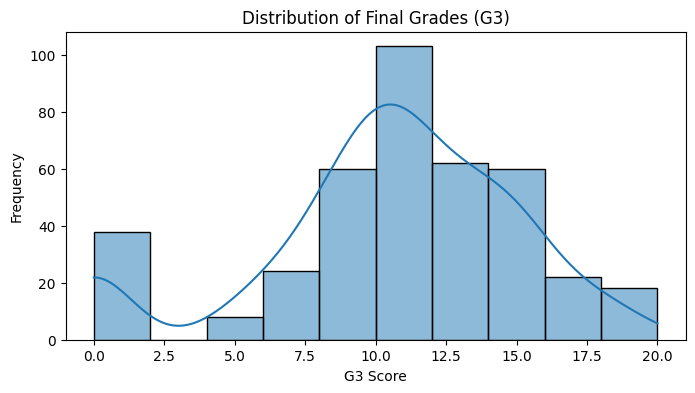

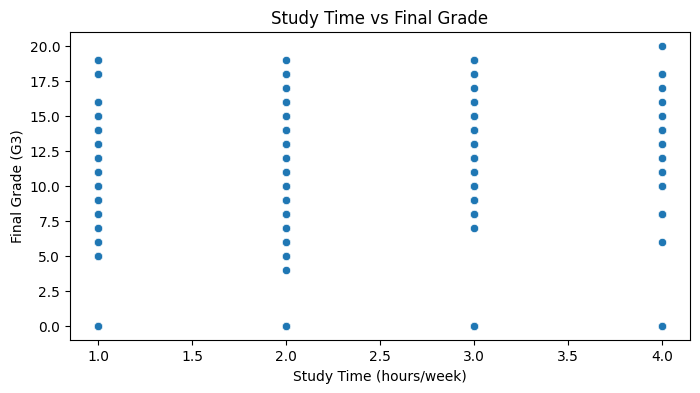

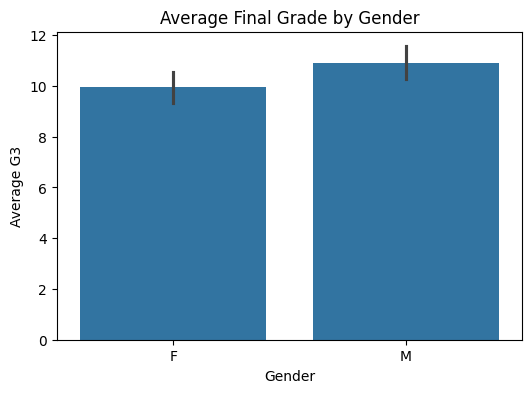

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of final grades
plt.figure(figsize=(8, 4))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3 Score')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: study time vs G3
plt.figure(figsize=(8, 4))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.show()

# Bar chart: average G3 by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='G3', data=df, estimator='mean')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.show()
